## Training a KNN model to diagnostic breast cancer

In [1]:
#Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Setting style
sns.set_palette("Dark2_r")
sns.set_style("darkgrid")

#### Reading data

In [3]:
df = pd.read_csv('../data/breast_cancer_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.info()

#### As we can see above, there is no missing values. Only a mysterious column with no name and no data

In [ ]:
df.describe()

#### The dataset has 32 columns, with 1 column referring to the patient ID and a last column with only null values

In [4]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

## Exploratory analysis

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data = df, x='diagnosis', y='radius_mean')
ax.set_title('Radius Mean vs Diagnosis', fontsize=20)
ax.set_xlabel('Diagnostic', fontsize=16)
ax.set_ylabel('Radius Mean', fontsize=16)
plt.show()

plt.figure(figsize=(10,10))
ax = sns.boxplot(data = df, x='diagnosis', y='perimeter_mean')
ax.set_title('Perimeter Mean versus Diagnosis', fontsize=20)
ax.set_xlabel('Diagnosis', fontsize=16)
ax.set_ylabel('Perimeter Mean', fontsize=16)
plt.show()

plt.figure(figsize=(10,10))
ax = sns.boxplot(data = df, x='diagnosis', y='concave points_mean')
ax.set_title('Concave Points Mean versus Diagnosis', fontsize=20)
ax.set_xlabel('Diagnosis', fontsize=16)
ax.set_ylabel('Concave Points Mean', fontsize=16)
plt.show()


#### We can see here that information such as the average perimeter and the average radius of a tumor can be quite discriminatory during diagnosis

#### Checking how balanced the target are

In [ ]:
ax = sns.catplot(x = 'diagnosis', data=df, kind='count')
ax;

In [ ]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(df.corr(), annot=True, linewidths=.5)
ax.set_title('Correlation map between variables', fontsize = 20)
ax;

### Variance

In [5]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
 
Var = VarianceThreshold()
Var.fit(df.drop(columns=['diagnosis']))
 
pd.DataFrame(data = Var.variances_.round(5), index=df.drop(columns=['diagnosis']).columns, columns=['Variance'])

,Variance
radius_mean,12.39709
texture_mean,18.46640
perimeter_mean,144.71000
area_mean,2357.50000
smoothness_mean,0.00020
compactness_mean,0.00278
concavity_mean,0.00634
concave points_mean,0.00150
symmetry_mean,0.00075
fractal_dimension_mean,0.00005


## Training

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

X = df.drop(columns=['diagnosis'])
y = LabelEncoder().fit_transform(df['diagnosis'])

#Split in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

#Applying a scaler
scaler = StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Creating the model
model = KNeighborsClassifier()
#Training the model
model.fit(X_scaled, y_train)

KNeighborsClassifier()

## Model Evaluating

In [7]:
from sklearn.metrics import confusion_matrix, classification_report

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       250
           1       0.99      0.96      0.97       148

    accuracy                           0.98       398
   macro avg       0.98      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398



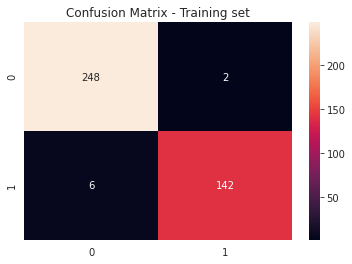

In [8]:
#Training set
pred = model.predict(X_scaled)
print(classification_report(y_train, pred))
sns.heatmap(confusion_matrix(y_train, pred), annot=True, fmt='d')
plt.title('Confusion Matrix - Training set')
plt.show()

In [ ]:
#Test set
pred = model.predict(X_test_scaled)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d')
plt.title('Confusion Matrix - Test set')
plt.show()

In [ ]:
print(classification_report(y_test, pred))

In [10]:
pred[0]

0

In [24]:
model.predict(X_test_scaled)[0]

0